## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [ ]:
boston = datasets.load_boston()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


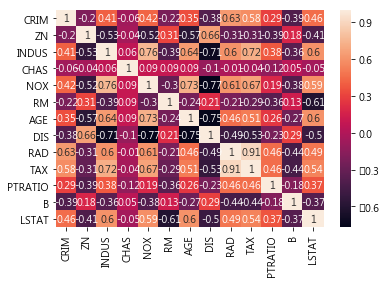

In [14]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


bos = pd.DataFrame(boston.data, columns = boston.feature_names) 
bos['PRICE'] = boston.target 
print(bos.head())

bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names) 
correlation_matrix = bos_1.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True)



In [15]:
X =boston.data[:, np.newaxis, 7]   #the 7th feature is DIS 
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

In [16]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_result = regression.predict(X_test)

#印出係數
print('coef', regression.coef_)
#印出均方誤差
print('MSE', mean_squared_error(y_test, y_result))

coef [1.20056584]
MSE 67.51937907310698


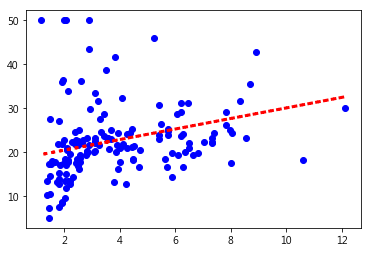

In [21]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_result, color='red', linewidth=3, linestyle=':')

plt.show()

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset: breast_cancer
breast_cancer = load_breast_cancer()
samples = breast_cancer.data
label = breast_cancer.target


X_train, X_test, y_train, y_test = train_test_split(samples, label, test_size=0.3)

lr = LogisticRegression()  

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9649122807017544


C:\Users\Wan-Hsing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
